![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)

In [7]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)


#设置完整显示数据
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 
              500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.2f}'.format)

pro = ts.pro_api('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
ts.set_token('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')




In [2]:
cn_en={
    'symbol':'代码',
    'name':'名称',
    'trade_date':'交易日',
    'total_mv':'总市值(亿)',
    'circ_mv':'流通市值(亿)',
}

In [3]:
#叶飞概念股票代码
#tickers = ['002074','300185','002387','603680','000980','603377','605118','600552','300523','688033','002965','300503','601020','603557','002363','603929','603709','002464']
tickers = ['维信诺', '龙腾光电', '京东方A', 'TCL科技', '深天马A']

In [4]:
stock_basic = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name')

if tickers[0].isnumeric():
    stock_list = stock_basic[stock_basic['symbol'].isin(tickers)]
else:
    stock_list = stock_basic[stock_basic['name'].isin(tickers)]
stock_list

,ts_code,symbol,name
38,000050.SZ,000050,深天马A
58,000100.SZ,000100,TCL科技
264,000725.SZ,000725,京东方A
838,002387.SZ,002387,维信诺
4056,688055.SH,688055,龙腾光电


In [5]:
daily_basic = pro.daily_basic(ts_code='', trade_date='20210521', fields='ts_code,trade_date,pe,pe_ttm,pb,total_mv,circ_mv')
daily_basic['total_mv'] = daily_basic['total_mv'].div(10000)
daily_basic['circ_mv'] = daily_basic['circ_mv'].div(10000)
stock_list = stock_list.merge(daily_basic, on=['ts_code'])
stock_list.sort_values(by='total_mv').rename(columns=cn_en)


,ts_code,代码,名称,交易日,pe,pe_ttm,pb,总市值(亿),流通市值(亿)
3,002387.SZ,002387,维信诺,20210521,57.64,"3,266.89",0.80,117.35,117.31
4,688055.SH,688055,龙腾光电,20210521,89.42,49.89,5.88,234.33,19.92
0,000050.SZ,000050,深天马A,20210521,22.50,19.61,0.97,331.80,281.57
1,000100.SZ,000100,TCL科技,20210521,27.15,18.66,3.55,"1,191.21","1,095.01"
2,000725.SZ,000725,京东方A,20210521,45.82,23.91,2.35,"2,307.13","2,223.50"


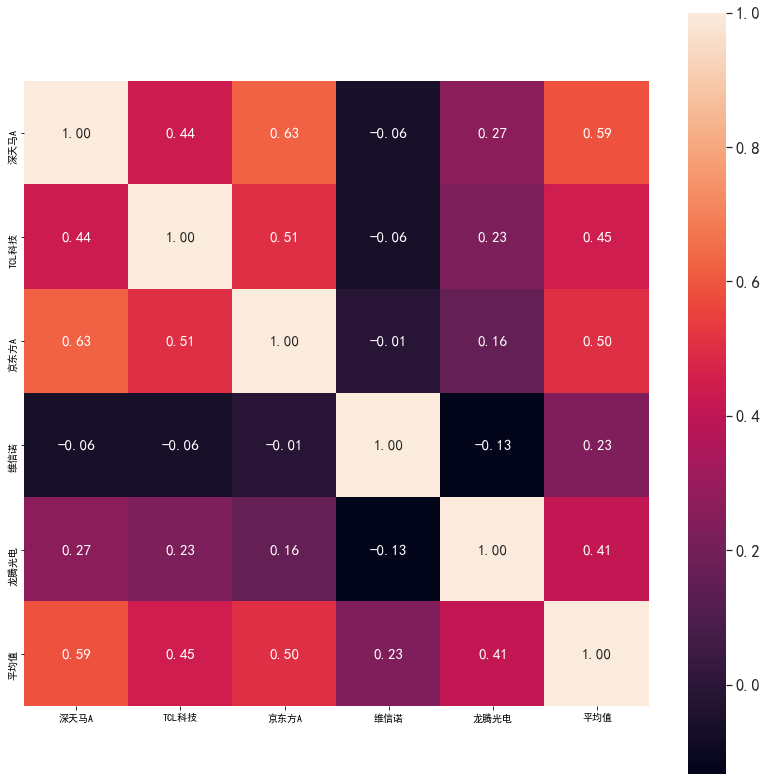

In [8]:
_names = stock_list['name']
all_data ={}

#遍历list里面的股票，可以写入多个股票
for name,ts_code in zip(stock_list['name'],stock_list['ts_code']):
    #获取各股票某时段的价格
    all_data[name] = ts.pro_bar(ts_code=ts_code, adj='qfq', start_date='20200521', end_date='20210521')
#用for循环遍历股票价格并转换为dataframe的形式
p_data = pd.DataFrame({tic: data['close']
                    for tic, data in all_data.items()})
p_data['平均值']= p_data.mean(axis=1)
#计算股票价格每日变化
returns = p_data.pct_change()[1:]

fig, ax = plt.subplots(figsize=(14,14)) 
cm = np.corrcoef(returns.values.T)
sns.set(font_scale=1.5,font=myfont.get_name())
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']}) 

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=returns.columns,
                 xticklabels=returns.columns,
                 ax=ax)


![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)